In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
train = pd.read_csv('/kaggle/input/ml-olympiad-for-students-topvistos-eua/train.csv')
test = pd.read_csv('/kaggle/input/ml-olympiad-for-students-topvistos-eua/test.csv')

In [3]:
train.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.24,Ano,S,Negado
1,EZYV5505,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.38,Ano,S,Aprovado
2,EZYV5207,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.21,Ano,S,Negado
3,EZYV7545,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.68,Semana,S,Negado
4,EZYV16071,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.24,Ano,S,Aprovado


In [4]:
train.describe()

,num_de_empregados,ano_de_estabelecimento,salario_prevalecente
count,17836.00000,17836.000000,17836.000000
mean,5726.50185,1979.494898,74327.428401
std,23321.37739,42.097194,52795.859573
min,-26.00000,1800.000000,2.136700
25%,1023.00000,1976.000000,33892.912500
50%,2117.00000,1997.000000,70106.920000
75%,3504.25000,2005.000000,107564.715000
max,602069.00000,2016.000000,319210.270000


In [5]:
test.describe()

,num_de_empregados,ano_de_estabelecimento,salario_prevalecente
count,7644.000000,7644.000000,7644.000000
mean,5528.306384,1979.211669,74755.382371
std,21809.034818,42.991855,52865.015248
min,-26.000000,1800.000000,3.003100
25%,1020.000000,1976.000000,34178.027500
50%,2094.500000,1997.000000,70716.775000
75%,3501.000000,2005.000000,108106.945000
max,547172.000000,2016.000000,306206.670000


In [6]:
train.isnull().sum()

id_do_caso                        0
continente                        0
educacao_do_empregado             0
tem_experiencia_de_trabalho       0
requer_treinamento_de_trabalho    0
num_de_empregados                 0
ano_de_estabelecimento            0
regiao_de_emprego                 0
salario_prevalecente              0
unidade_de_salario                0
posicao_em_tempo_integral         0
status_do_caso                    0
dtype: int64

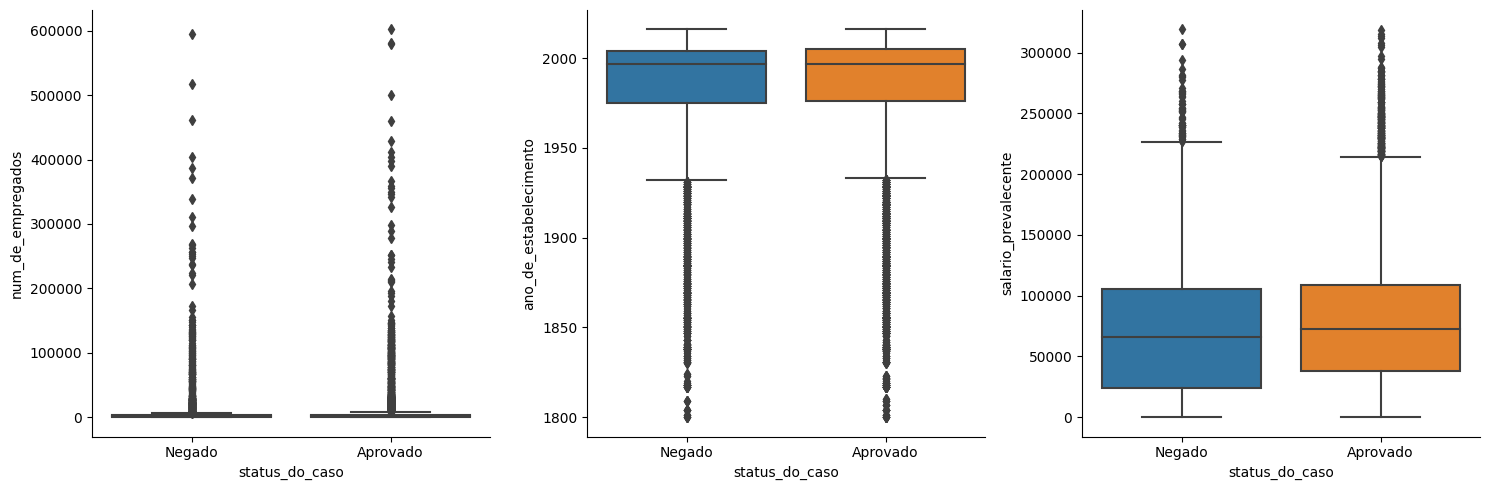

In [7]:
# Variáveis qualitativas
variaveis_quantitativas = ['num_de_empregados', 'ano_de_estabelecimento', 'salario_prevalecente']

# Configurar o tamanho da figura
plt.figure(figsize=(15, 5))

# Criar gráficos boxplot lado a lado na vertical
for i, variavel in enumerate(variaveis_quantitativas, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=variavel, x='status_do_caso', data=train)
    sns.despine()

# Exibir os gráficos lado a lado
plt.tight_layout()
plt.show()

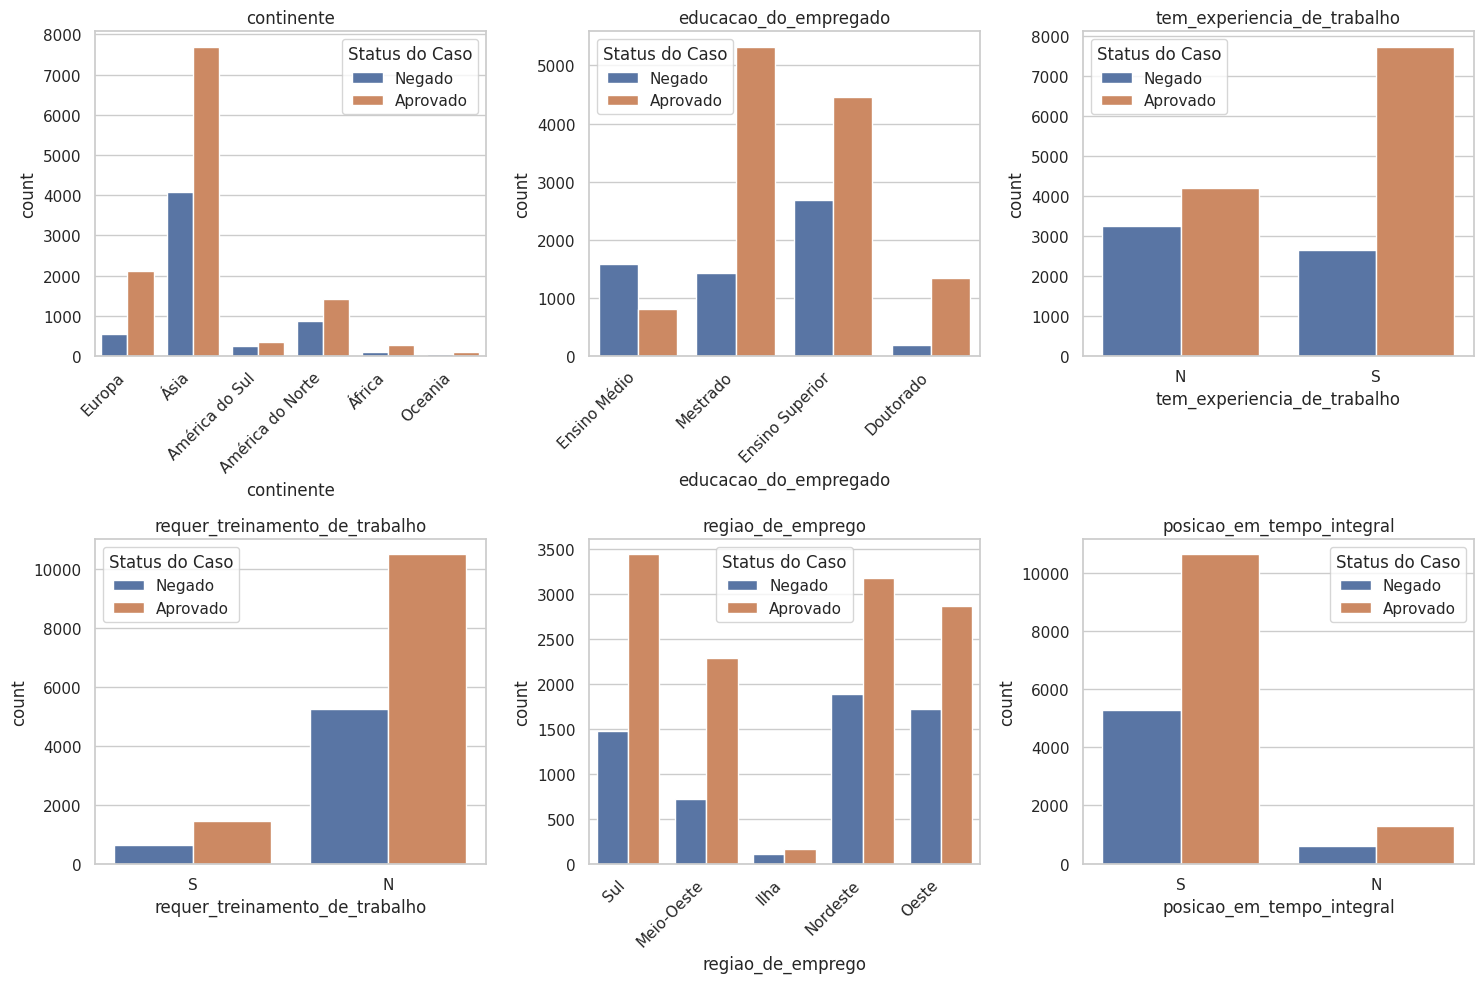

In [8]:
# Lista de variáveis qualitativas
variaveis_qualitativas = ['continente', 'educacao_do_empregado', 'tem_experiencia_de_trabalho',
                          'requer_treinamento_de_trabalho', 'regiao_de_emprego', 'posicao_em_tempo_integral']

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Calcular o número de linhas e colunas para os subplots
num_linhas = 2
num_colunas = len(variaveis_qualitativas) // num_linhas + len(variaveis_qualitativas) % num_linhas

# Criar subplots lado a lado
fig, axes = plt.subplots(nrows=num_linhas, ncols=num_colunas, figsize=(15, 5 * num_linhas))

# Loop sobre as variáveis qualitativas e subplots correspondentes
for i, var in enumerate(variaveis_qualitativas):
    # Calcular as coordenadas do subplot atual
    row = i // num_colunas
    col = i % num_colunas
    
    # Plotar o gráfico de contagem para cada variável com base no 'hue' de 'status_do_caso'
    ax = axes[row, col]
    sns.countplot(x=var, hue='status_do_caso', data=train, ax=ax)
    ax.set_title(var)
    ax.legend(title='Status do Caso')

# Rotacionar as labels do eixo x em 45 graus
    if var in ['continente', 'regiao_de_emprego','educacao_do_empregado']:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remover subplots vazios
if len(variaveis_qualitativas) < num_linhas * num_colunas:
    for i in range(len(variaveis_qualitativas), num_linhas * num_colunas):
        fig.delaxes(axes.flatten()[i])

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [9]:
# Distruibuição da variáveis target
train["status_do_caso"].value_counts(normalize=True)


Aprovado    0.669264
Negado      0.330736
Name: status_do_caso, dtype: float64

Pré Processamento

In [10]:
# Dropando a coluna id_do_caso

train = train.drop('id_do_caso', axis=1)

In [11]:
encoded_vars = ['continente', 'educacao_do_empregado', 'tem_experiencia_de_trabalho',
                          'requer_treinamento_de_trabalho', 'regiao_de_emprego', 'posicao_em_tempo_integral','status_do_caso']

# Inicializar o OneHotEncoder
encoder = OneHotEncoder()

# Aplicar a codificação One-Hot Encode
encoded_train = encoder.fit_transform(train[encoded_vars].values).toarray()

# Obter as categorias codificadas
encoded_categories = encoder.categories_

# Obter os nomes das colunas originais
column_names = []
for i, feature in enumerate(train[encoded_vars].columns):
    column_names.extend([f"{feature}_{category}" for category in encoded_categories[i]])

# Criar um novo DataFrame com as variáveis codificadas
df_encoded_train = pd.DataFrame(encoded_train, columns=column_names)



In [27]:
df_encoded_train.head(5)

,continente_América do Norte,continente_América do Sul,continente_Europa,continente_Oceania,continente_África,continente_Ásia,educacao_do_empregado_Doutorado,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,...,requer_treinamento_de_trabalho_S,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,posicao_em_tempo_integral_N,posicao_em_tempo_integral_S,status_do_caso_Aprovado,status_do_caso_Negado
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [13]:
train[variaveis_quantitativas].head()

,num_de_empregados,ano_de_estabelecimento,salario_prevalecente
0,2087,1855,69711.24
1,5991,2003,52931.38
2,1426,2000,110830.21
3,3846,1992,91884.68
4,3957,1949,138155.24


In [14]:
dfModel = train[variaveis_quantitativas].join(df_encoded_train)

In [15]:
dfModel.head()

,num_de_empregados,ano_de_estabelecimento,salario_prevalecente,continente_América do Norte,continente_América do Sul,continente_Europa,continente_Oceania,continente_África,continente_Ásia,educacao_do_empregado_Doutorado,...,requer_treinamento_de_trabalho_S,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,posicao_em_tempo_integral_N,posicao_em_tempo_integral_S,status_do_caso_Aprovado,status_do_caso_Negado
0,2087,1855,69711.24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,5991,2003,52931.38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1426,2000,110830.21,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3846,1992,91884.68,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3957,1949,138155.24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [16]:
dfModel.isnull().sum()

num_de_empregados                        0
ano_de_estabelecimento                   0
salario_prevalecente                     0
continente_América do Norte              0
continente_América do Sul                0
continente_Europa                        0
continente_Oceania                       0
continente_África                        0
continente_Ásia                          0
educacao_do_empregado_Doutorado          0
educacao_do_empregado_Ensino Médio       0
educacao_do_empregado_Ensino Superior    0
educacao_do_empregado_Mestrado           0
tem_experiencia_de_trabalho_N            0
tem_experiencia_de_trabalho_S            0
requer_treinamento_de_trabalho_N         0
requer_treinamento_de_trabalho_S         0
regiao_de_emprego_Ilha                   0
regiao_de_emprego_Meio-Oeste             0
regiao_de_emprego_Nordeste               0
regiao_de_emprego_Oeste                  0
regiao_de_emprego_Sul                    0
posicao_em_tempo_integral_N              0
posicao_em_

Split Train e Test

In [17]:
# Dividindo preditores (X) e variável target (Y)

X = dfModel.drop(["status_do_caso_Aprovado","status_do_caso_Negado"], axis =1)

y = dfModel["status_do_caso_Aprovado"]

In [18]:
# Criand base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [19]:
# Padronizando

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1, random_state=1, kernel='rbf')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(C=1, random_state=1)

In [21]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))
print("f1 score %.3f" %metrics.f1_score(y_test, y_predict))


Accuracy score 0.744
f1 score 0.819


In [22]:
# Salvando a coluna 'id_do_caso' 
test_id= test['id_do_caso']
test_id.head()

0    EZYV22339
1     EZYV9333
2     EZYV9740
3     EZYV3328
4    EZYV12321
Name: id_do_caso, dtype: object

In [23]:
# Dataframe para salvar os dados de teste
df_test1=test.drop(['id_do_caso'],axis=1)
df_test1

,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral
0,Ásia,Ensino Superior,S,N,2414,1973,Nordeste,103320.800,Ano,N
1,Ásia,Mestrado,N,S,2928,1937,Oeste,49786.350,Ano,S
2,Ásia,Ensino Superior,S,N,1836,1999,Oeste,60855.830,Ano,S
3,Ásia,Ensino Superior,S,N,122,2004,Sul,82379.060,Semana,S
4,América do Sul,Ensino Superior,S,S,1720,2003,Nordeste,6719.810,Ano,S
...,...,...,...,...,...,...,...,...,...,...
7639,América do Norte,Ensino Superior,N,N,66,2008,Oeste,70.599,Hora,S
7640,Ásia,Ensino Médio,S,N,4040,1994,Meio-Oeste,60158.590,Ano,S
7641,Ásia,Mestrado,S,N,32503,1925,Sul,44555.120,Ano,S
7642,América do Norte,Mestrado,S,N,1894,2000,Sul,97830.730,Ano,S


In [44]:
# Salvando as colunas numéricas
test_num =test[['num_de_empregados', 'ano_de_estabelecimento', 'salario_prevalecente']]

,num_de_empregados,ano_de_estabelecimento,salario_prevalecente
0,2414,1973,103320.80
1,2928,1937,49786.35
2,1836,1999,60855.83
3,122,2004,82379.06
4,1720,2003,6719.81


Pré Processamento da base de teste

In [24]:
encoded_vars = ['continente', 'educacao_do_empregado', 'tem_experiencia_de_trabalho',
                          'requer_treinamento_de_trabalho', 'regiao_de_emprego', 'posicao_em_tempo_integral']

# Inicializar o OneHotEncoder
encoder = OneHotEncoder()

# Aplicar a codificação One-Hot Encode
encoded_test = encoder.fit_transform(df_test1[encoded_vars].values).toarray()

# Obter as categorias codificadas
encoded_categories = encoder.categories_

# Obter os nomes das colunas originais
column_names = []
for i, feature in enumerate(df_test1[encoded_vars].columns):
    column_names.extend([f"{feature}_{category}" for category in encoded_categories[i]])

# Criar um novo DataFrame com as variáveis codificadas
df_encoded_test = pd.DataFrame(encoded_test, columns=column_names)

In [47]:
dfModel_test = test_num.join(df_encoded_test)

In [48]:
sc = StandardScaler()
sc.fit(dfModel_test)
df_encoded_test_std = sc.transform(dfModel_test)
df_encoded_test_std = pd.DataFrame(df_encoded_test_std)

In [50]:
df_encoded_test_std.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.142808,-0.144494,0.540382,-0.387289,-0.188393,-0.40519,-0.083558,-0.145279,0.707107,-0.307411,...,0.853598,0.359303,-0.359303,-0.123589,-0.451839,1.608430,-0.594676,-0.616468,2.914730,-2.914730
1,-0.119238,-0.981917,-0.472348,-0.387289,-0.188393,-0.40519,-0.083558,-0.145279,0.707107,-0.307411,...,-1.171512,-2.783163,2.783163,-0.123589,-0.451839,-0.621724,1.681589,-0.616468,-0.343085,0.343085
2,-0.169313,0.460311,-0.262943,-0.387289,-0.188393,-0.40519,-0.083558,-0.145279,0.707107,-0.307411,...,0.853598,0.359303,-0.359303,-0.123589,-0.451839,-0.621724,1.681589,-0.616468,-0.343085,0.343085
3,-0.247909,0.576620,0.144220,-0.387289,-0.188393,-0.40519,-0.083558,-0.145279,0.707107,-0.307411,...,0.853598,0.359303,-0.359303,-0.123589,-0.451839,-0.621724,-0.594676,1.622145,-0.343085,0.343085
4,-0.174632,0.553358,-1.287052,-0.387289,5.308067,-0.40519,-0.083558,-0.145279,-1.414214,-0.307411,...,0.853598,-2.783163,2.783163,-0.123589,-0.451839,1.608430,-0.594676,-0.616468,-0.343085,0.343085


In [51]:
# Predição para a base de dados teste
test_predict = svc.predict(df_encoded_test_std)
test_preds = pd.DataFrame()
test_preds["id_do_caso"] = test_id
test_preds["status_do_caso"] = test_predict
test_preds["status_do_caso"] = test_preds["status_do_caso"].astype('int32')
test_preds

,id_do_caso,status_do_caso
0,EZYV22339,1
1,EZYV9333,1
2,EZYV9740,1
3,EZYV3328,1
4,EZYV12321,1
...,...,...
7639,EZYV19907,0
7640,EZYV576,0
7641,EZYV1804,1
7642,EZYV13543,1


In [52]:
# Exportando o resultado da predição
test_preds.to_csv("submission.csv",index=False)